<a href="https://colab.research.google.com/github/jsKim-prog/AIStudy24/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 올바른 결과 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거친다.
* 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준점수로 특성의 스케일 변환을 해보자.

> 만약 길이가 25cm이고 무게가 150g이면 도미인데, 빙어로 결론이 나왔다!!!

In [1]:
# 앞쪽 35개는 도미(1), 뒤쪽 14개는 빙어(0) -> 총 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np  # 넘파이 배열용 파이썬 라이브러리
np.column_stack(([1,2,3,], [4,5,6]))    # .column(열)_stack(쌓는다)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))
#fish_data 변수에 2차원 배열을 넣는다(앞쪽 : 길이, 뒤쪽 :무게)
print(fish_data[:5])    # 5개만 미리 보기

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [4]:
# 정답파일을 생성한다.
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [5]:
print(np.zeros(10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))   #.concatenate  :1차원배열(1이 35개, 0이 14개)
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(train_input.shape, test_input.shape)
# train_input : 훈련용 입력값
# test_input : 테스트용 입력값
# train_target : 훈련용 정답
# test_target : 테스트용 정답
# stratify : 타겟값을 넣어줌(target의 class 비율을 유지한 채 데이터 셋을 split 함)
# random_state : 시드값을 42로 지정하고 랜덤 적용(수업용)

(36, 2) (13, 2)


`train_test_split`
* target의 class 비율을 유지한 채 데이터 셋 split

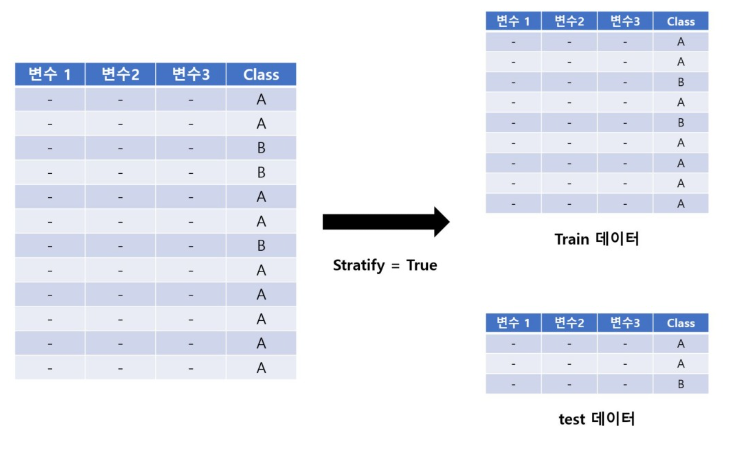

In [8]:
print(train_target.shape, test_target.shape)    # 결과가 튜플로 나온다.

(36,) (13,)


In [9]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
from sklearn.neighbors import KNeighborsClassifier  #k-이웃 근접 알고리즘
kn=KNeighborsClassifier()   # 객체생성
kn.fit(train_input, train_target)   # 훈련시작

KNeighborsClassifier()

In [11]:
kn.score(test_input, test_target)   # 평가시작(테스트 입력, 테스트 정답)

1.0

In [12]:
print(kn.predict([[25, 150]]))  # 도미 25cm, 150g 처리결과 -> 0(빙어???)

[0.]


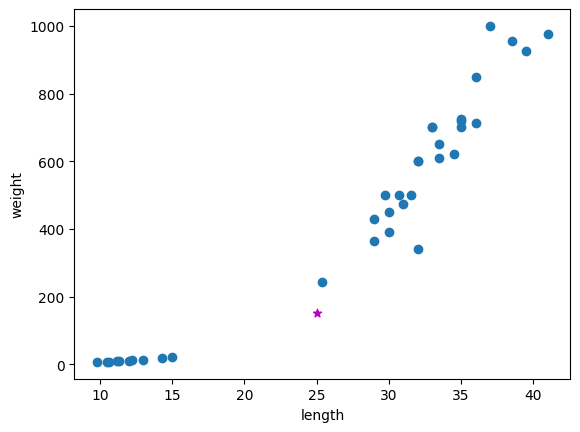

In [19]:
# 그래프로 확인해 보자.
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, c='m', marker='*') # 마커종류 변경 : https://wikidocs.net/92083
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

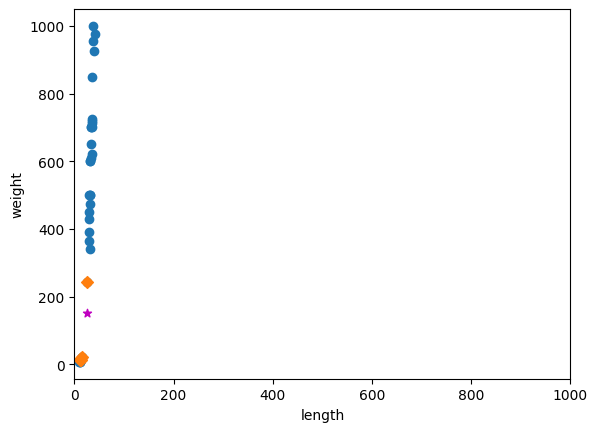

In [24]:
# 결론 : x와 y축의 비율이 다르기에 정확한 그래프로 판단할 수 없다.
# k-근접 이웃 알고리즘은 주변에 있는 5개를 보기 때문에 좀더 알아볼 필요가 있다.

distances, indexes = kn.kneighbors([[25, 150]]) #내가 알고 싶은 값의 거리와 인덱스를 알아보자.

plt.scatter(train_input[:,0], train_input[:,1]) # 입력데이터의 값
plt.scatter(25, 150, c='m', marker='*') # 알고 싶은 값
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')    # 이웃들의 값
plt.xlim((0, 1000)) # x축의 범위를 0~1000까지로 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()  # 결론 : 다이아몬드로 25, 150에 대한 이웃이 누군지 파악됨 -> 4:1로 빙어

In [25]:
print(train_input[indexes]) # k-최근접 알고리즘에 근접한 5개의 값(도미 1, 빙어 4)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [26]:
print(train_target[indexes])    # 도미 1, 빙어 4

[[1. 0. 0. 0. 0.]]


In [27]:
print(distances)    # 거리 출력

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [28]:
# 평균 구해보기(가장 널리 사용하는 전처리 방법 : 표준점수, z점수라고 함)
# 표준점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄
# 분산은 데이터에 평균을 뺀 값을 모두 제곱한 다음 평균을 내어 구함
# 표준편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타냄
# 표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값

mean = np.mean(train_input, axis=0) # 평균을 구한다. axis : 중심선
std = np.std(train_input, axis=0)   # 표준편차를 구한다.
# train_input -> 36개의 요소와 2개의 특성을 가짐(36, 2) 크기의 배열임
# 행을 따라 각 열의 통계 값을 계산함
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


* axis : 중심선 설정

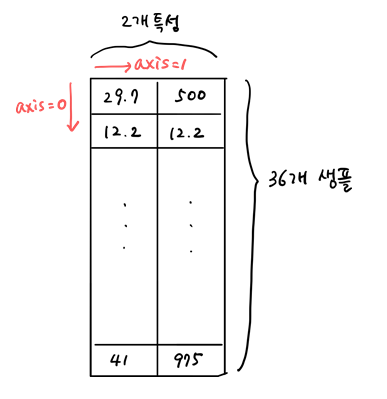

In [31]:
# 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수를 변환

train_scaled = (train_input - mean) / std   # 표준점수 공식(암기)
# 원본데이터에서 평균을 빼고 표준편차로 나눔
# 넘파이는 train_input의 모든 행에서 mean에 있는 두 평균 값을 빼줌
# std에 있는 두 표준편차를 다시 모든 행에 적용(브로드캐스팅)

* 표준점수 변환 과정

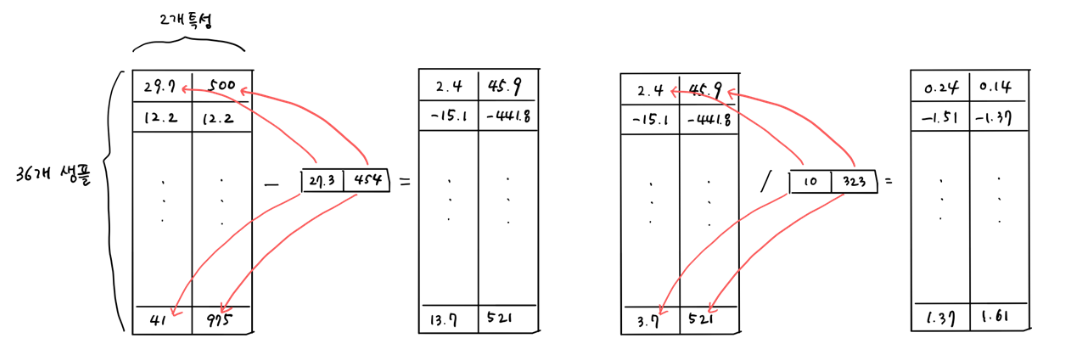

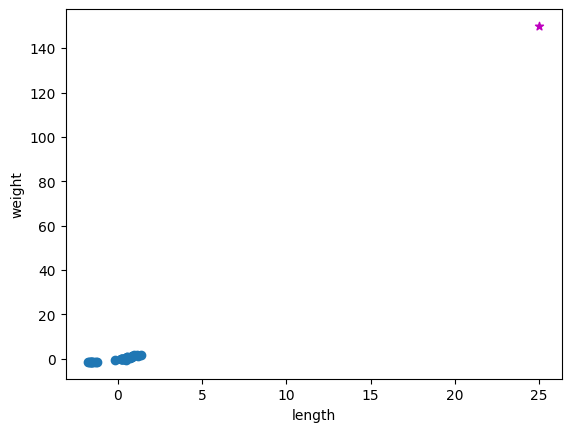

In [33]:
# 전처리 데이터를 이용해서 모델 훈련시키기
plt.scatter(train_scaled[:,0], train_scaled[:,1]) # 입력데이터의 값
plt.scatter(25, 150, c='m', marker='*') # 추가데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()  # 오른쪽 맨 꼭대기에 수상한 샘플이 생김
# 전처리된 데이터는 표준점수를 위해서 값이 축소되어 있는데
# 알고자 하는 값은 표준점수화가 안됨
# 훈련세트를 평균으로 빼고 표준편차로 나누어 주었기 때문에 값의 범위가 달라짐

In [35]:
def show_plt():
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

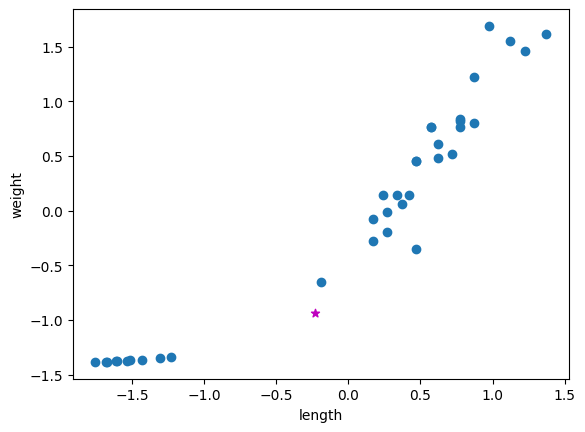

In [36]:
# 동일한 기준으로 샘플 변환하고 출력
new = ([25, 150]-mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], c='m', marker='*') #배열로 생성하고 표준편차 적용 후 추가데이터
show_plt()
# x, y 축의 범위가 비슷함(-1.5~1.5 사이값)

In [37]:
# 훈련시작!!!
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [38]:
test_scaled = (test_input - mean) / std # 표준점수화


In [40]:
kn.score = (test_scaled, test_target)   # 평가진행
print(kn.predict([new]))    # 25, 150 결과
# [1.] 도미로 예측 성공

[1.]


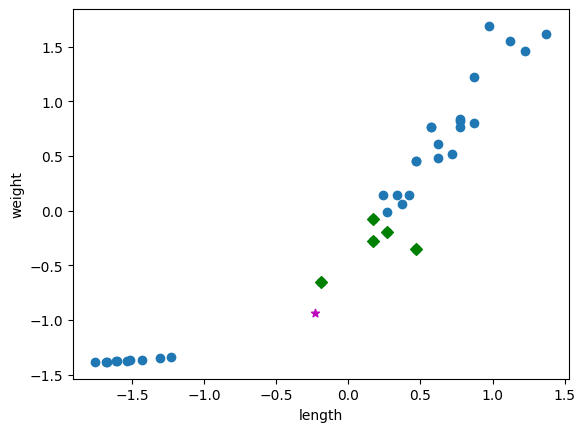

In [42]:
# kneighbors()로 최근접 이웃을 구한다음 산점도로 그려봄
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], c='m', marker='*')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], c='g', marker='D')
show_plt()